In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('Universities.csv')

In [3]:
df.head(10)

,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
0,1,University of Oxford,United Kingdom,20664,11.2,0.41,0.46,0.54,90.5,99.6,98.4,65.5,96.4,95.4,95.4
1,2,California Institute of Technology,United States,2240,6.4,0.30,0.34,0.66,92.1,97.2,97.9,88.0,82.5,94.5,94.5
2,3,University of Cambridge,United Kingdom,18978,10.9,0.37,0.47,0.53,91.4,98.7,95.8,59.3,95.0,94.4,94.4
3,4,Stanford University,United States,16135,7.3,0.23,0.43,0.57,92.8,96.4,99.9,66.2,79.5,94.3,94.3
4,5,Massachusetts Institute of Technology,United States,11247,8.6,0.34,0.39,0.61,90.5,92.4,99.5,86.9,89.0,93.6,93.6
5,6,Princeton University,United States,7983,8.1,0.25,0.45,0.55,90.3,96.3,98.8,58.6,81.1,93.2,93.2
6,7,Harvard University,United States,20823,9.2,0.24,0.49,0.51,89.2,98.6,99.1,47.3,76.3,93.0,93
7,8,Yale University,United States,12402,5.4,0.20,0.50,0.50,92.0,94.8,97.3,52.4,68.7,91.7,91.7
8,9,University of Chicago,United States,13833,5.7,0.28,0.46,0.54,89.1,91.4,96.7,52.7,76.0,90.2,90.2
9,10,Imperial College London,United Kingdom,16760,11.7,0.56,0.38,0.62,84.5,87.6,97.0,69.9,97.1,89.8,89.8


In [4]:
df.columns

Index(['Score_Rank', 'University', 'Country', 'Number_students',
       'Numb_students_per_Staff', 'International_Students',
       'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result',
       'Overall_Ranking'],
      dtype='object')

In [5]:
df=df.drop(columns=['Percentage_Male', 'University', 'Overall_Ranking', 'Country'])

In [6]:
#df_cat = df[['Country']]

In [7]:
#df_cat.head(5)

In [8]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [9]:
#df_cat = onehotencoder.fit_transform(df_cat).toarray()

In [10]:
#df_cat.shape

In [11]:
#df_cat = pd.DataFrame(df_cat)

In [12]:
#df_cat

In [13]:
#df_quant = df[['Score_Rank', 'Number_students',
       #'Numb_students_per_Staff', 'International_Students',
      # 'Percentage_Female', 'Teaching', 'Research',
      # 'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result']]

In [14]:
#df_cat.reset_index(drop=True, inplace=True)
#df_quant.reset_index(drop=True, inplace=True)
#df2 = pd.concat([df_cat, df_quant], axis = 1)

In [15]:
df.head(5)

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,1,20664,11.2,0.41,0.46,90.5,99.6,98.4,65.5,96.4,95.4
1,2,2240,6.4,0.30,0.34,92.1,97.2,97.9,88.0,82.5,94.5
2,3,18978,10.9,0.37,0.47,91.4,98.7,95.8,59.3,95.0,94.4
3,4,16135,7.3,0.23,0.43,92.8,96.4,99.9,66.2,79.5,94.3
4,5,11247,8.6,0.34,0.39,90.5,92.4,99.5,86.9,89.0,93.6


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Score_Rank               1396 non-null   int64  
 1   Number_students          1396 non-null   int64  
 2   Numb_students_per_Staff  1396 non-null   float64
 3   International_Students   1396 non-null   float64
 4   Percentage_Female        1396 non-null   float64
 5   Teaching                 1396 non-null   float64
 6   Research                 1396 non-null   float64
 7   Citations                1396 non-null   float64
 8   Industry_Income          1396 non-null   float64
 9   International_Outlook    1396 non-null   float64
 10  Score_Result             1396 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 120.1 KB


In [17]:
df.describe()

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,315.304441,23723.029370,18.966905,0.123424,0.475279,28.229083,23.981160,48.113109,46.477292,47.114542,34.794054
std,140.946223,32826.064794,16.835492,0.383978,0.160516,14.149550,17.537044,27.735626,16.273498,23.288723,16.946075
min,1.000000,558.000000,0.900000,0.000000,0.000000,11.200000,6.800000,1.700000,34.400000,13.100000,10.700000
25%,212.000000,10262.000000,12.375000,0.020000,0.410000,18.300000,11.600000,23.375000,35.775000,27.475000,21.000000
50%,336.000000,17832.500000,16.350000,0.080000,0.520000,23.800000,18.000000,45.650000,39.400000,43.100000,31.600000
75%,437.000000,29434.000000,21.900000,0.170000,0.570000,33.600000,30.100000,71.950000,49.825000,62.800000,44.500000
max,535.000000,830104.000000,493.500000,13.770000,1.000000,92.800000,99.600000,100.000000,100.000000,99.700000,95.400000


In [18]:
#What university has 830K students?

In [19]:
df[df['Number_students']==830104]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
1084,447,830104,493.5,0.01,0.37,13.0,24.1,16.5,100.0,17.3,19.9


In [20]:
#what is the number one university?

In [21]:
df[df['Score_Rank']==1]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,1,20664,11.2,0.41,0.46,90.5,99.6,98.4,65.5,96.4,95.4


In [22]:
#What universities are all women?

In [23]:
df[df['Percentage_Female']==1]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
662,323,14510,16.9,0.15,1.0,29.9,30.8,31.4,69.9,46.7,32.9
1190,472,2775,14.8,0.04,1.0,23.3,12.7,13.0,37.8,23.9,17.4
1267,491,10110,22.5,0.01,1.0,18.1,9.9,16.8,36.8,15.2,15.5


In [24]:
#What about industry income?

In [25]:
df[df['Industry_Income']==100]

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
22,22,38783,12.0,0.11,0.34,86.6,94.0,74.6,100.0,47.4,82.6
31,30,34519,34.7,0.17,0.61,68.4,77.0,88.8,100.0,67.2,77.8
42,37,40472,47.8,0.27,0.34,64.6,70.4,85.5,100.0,72.9,74.1
58,50,13914,21.3,0.27,0.53,49.3,57.1,96.1,100.0,81.9,69.4
85,69,21475,42.8,0.23,0.54,49.1,51.6,83.1,100.0,75.7,63.3
107,84,33427,10.7,0.22,0.23,66.0,64.7,50.6,100.0,61.8,61.5
195,130,28521,26.3,0.08,0.56,31.2,43.2,78.8,100.0,73.7,54.0
363,217,3651,9.5,0.26,0.55,27.7,32.9,54.0,100.0,95.4,44.0
479,262,6489,10.8,0.24,0.31,37.5,36.1,33.6,100.0,63.7,39.4
757,356,34825,23.0,0.04,0.34,25.2,28.0,30.2,100.0,26.8,29.5


In [26]:
df.isnull().sum()

Score_Rank                 0
Number_students            0
Numb_students_per_Staff    0
International_Students     0
Percentage_Female          0
Teaching                   0
Research                   0
Citations                  0
Industry_Income            0
International_Outlook      0
Score_Result               0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
#no rows are duplicated

array([[<AxesSubplot:title={'center':'Score_Rank'}>,
        <AxesSubplot:title={'center':'Number_students'}>,
        <AxesSubplot:title={'center':'Numb_students_per_Staff'}>],
       [<AxesSubplot:title={'center':'International_Students'}>,
        <AxesSubplot:title={'center':'Percentage_Female'}>,
        <AxesSubplot:title={'center':'Teaching'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Citations'}>,
        <AxesSubplot:title={'center':'Industry_Income'}>],
       [<AxesSubplot:title={'center':'International_Outlook'}>,
        <AxesSubplot:title={'center':'Score_Result'}>, <AxesSubplot:>]],
      dtype=object)

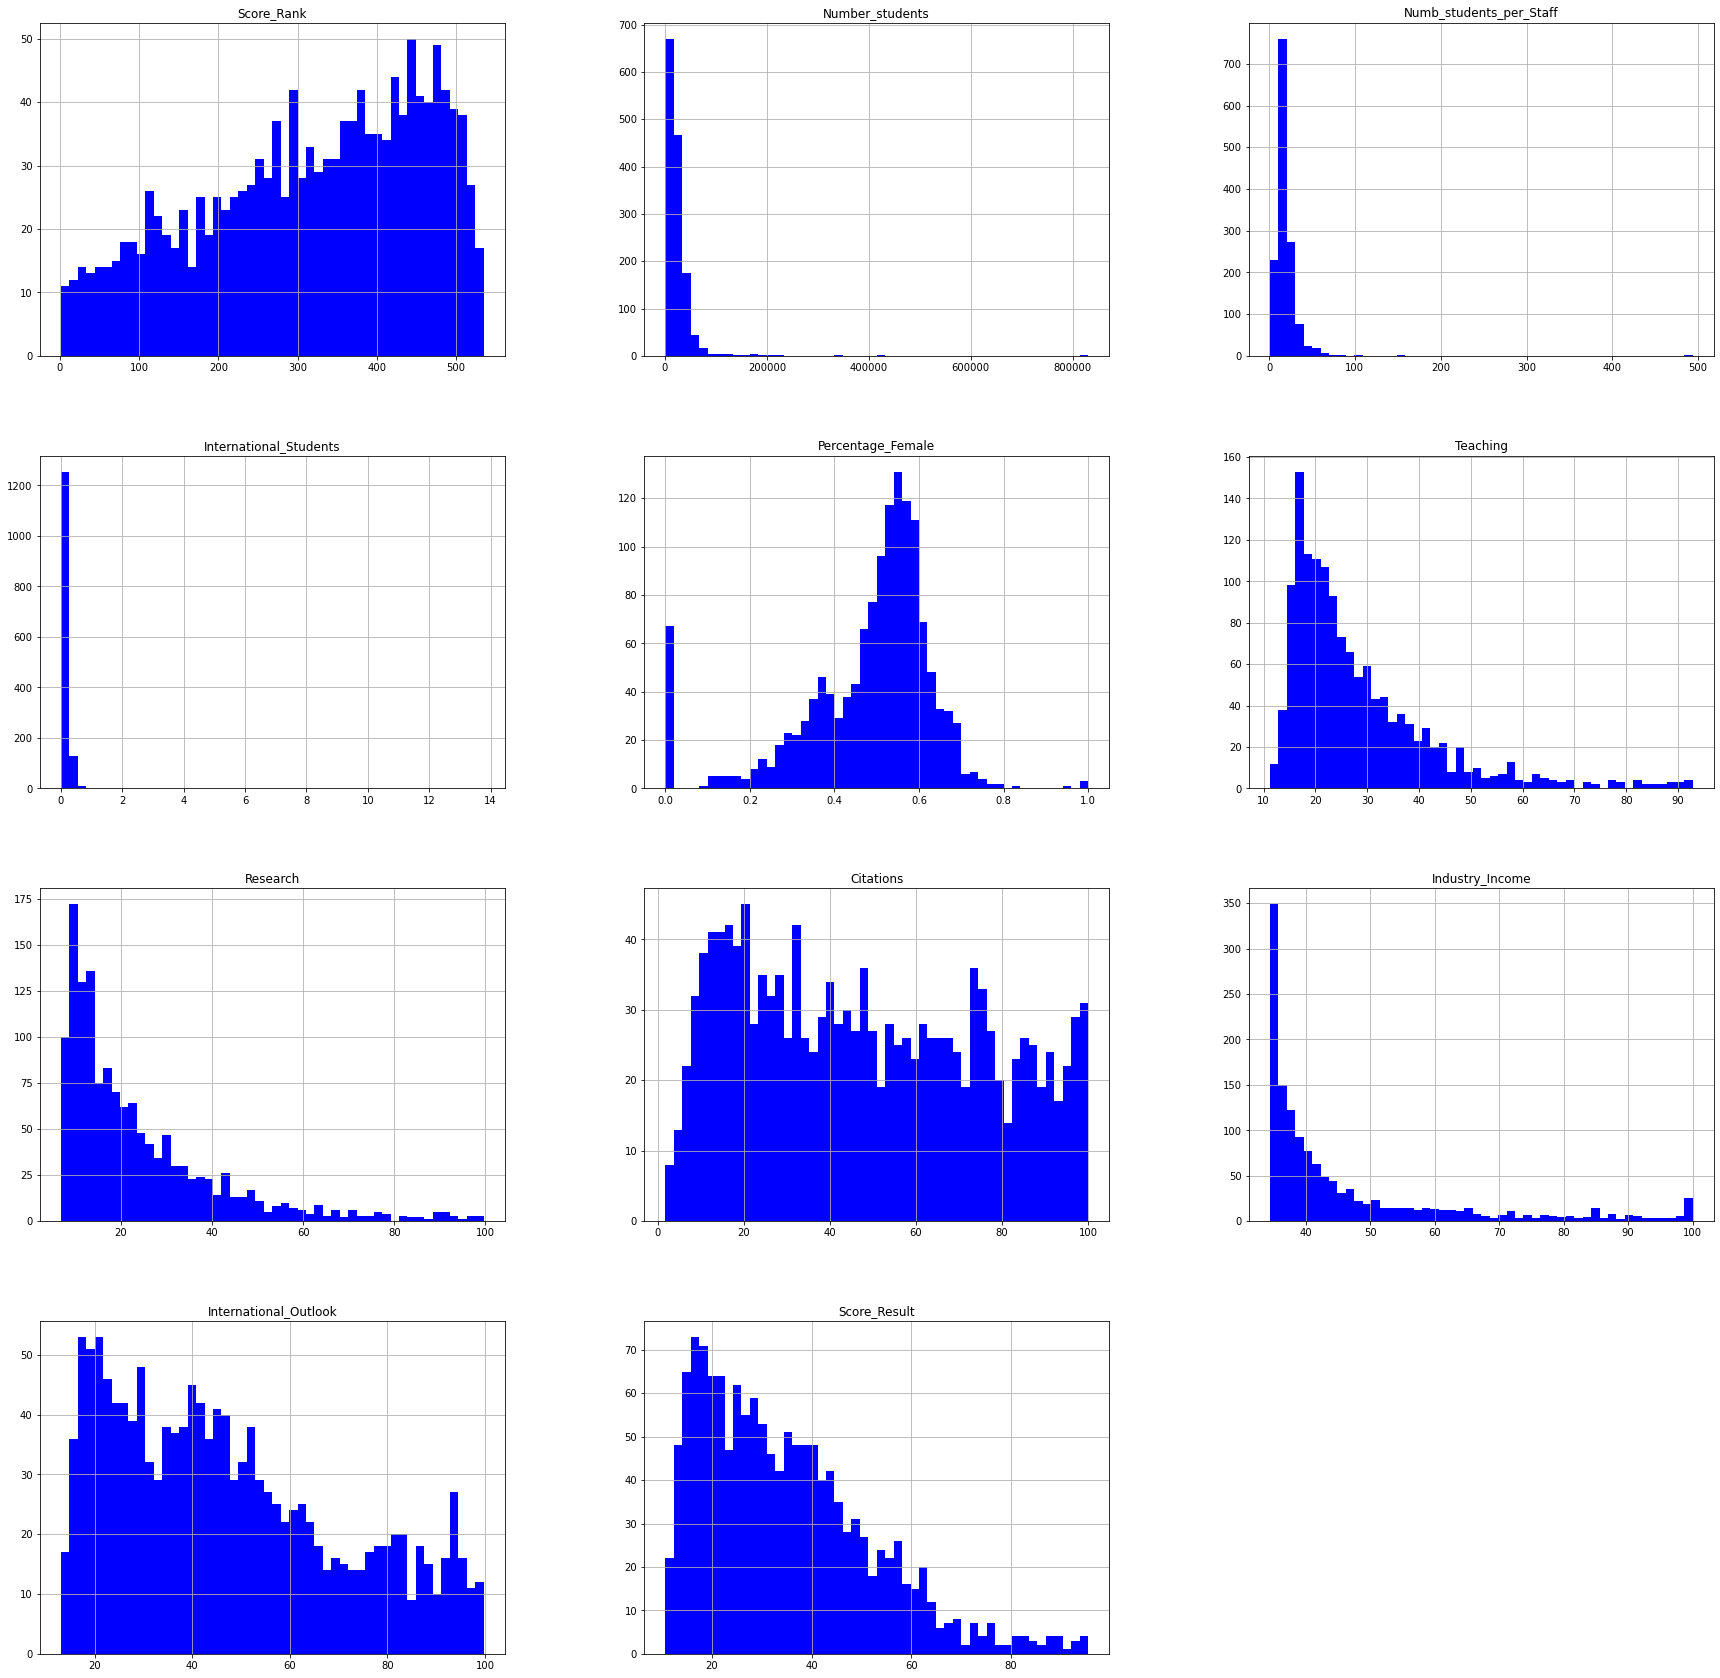

In [29]:
df.hist(bins = 50, figsize = (30, 30), color = 'b')

In [30]:
#plotting the kernal density function

In [31]:
#n = len(df2.columns)

In [32]:
df.columns

Index(['Score_Rank', 'Number_students', 'Numb_students_per_Staff',
       'International_Students', 'Percentage_Female', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook',
       'Score_Result'],
      dtype='object')

In [33]:
#plt.figure(figsize = (10,50))
#for i in range(len(df2.columns)):
    #plt.subplot(11, 1, i+1)
    #sns.distplot(df2[df_quant.columns[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    #plt.title(df2.columns[i])

In [34]:
#correlations

In [35]:
corr = df.corr()

<AxesSubplot:>

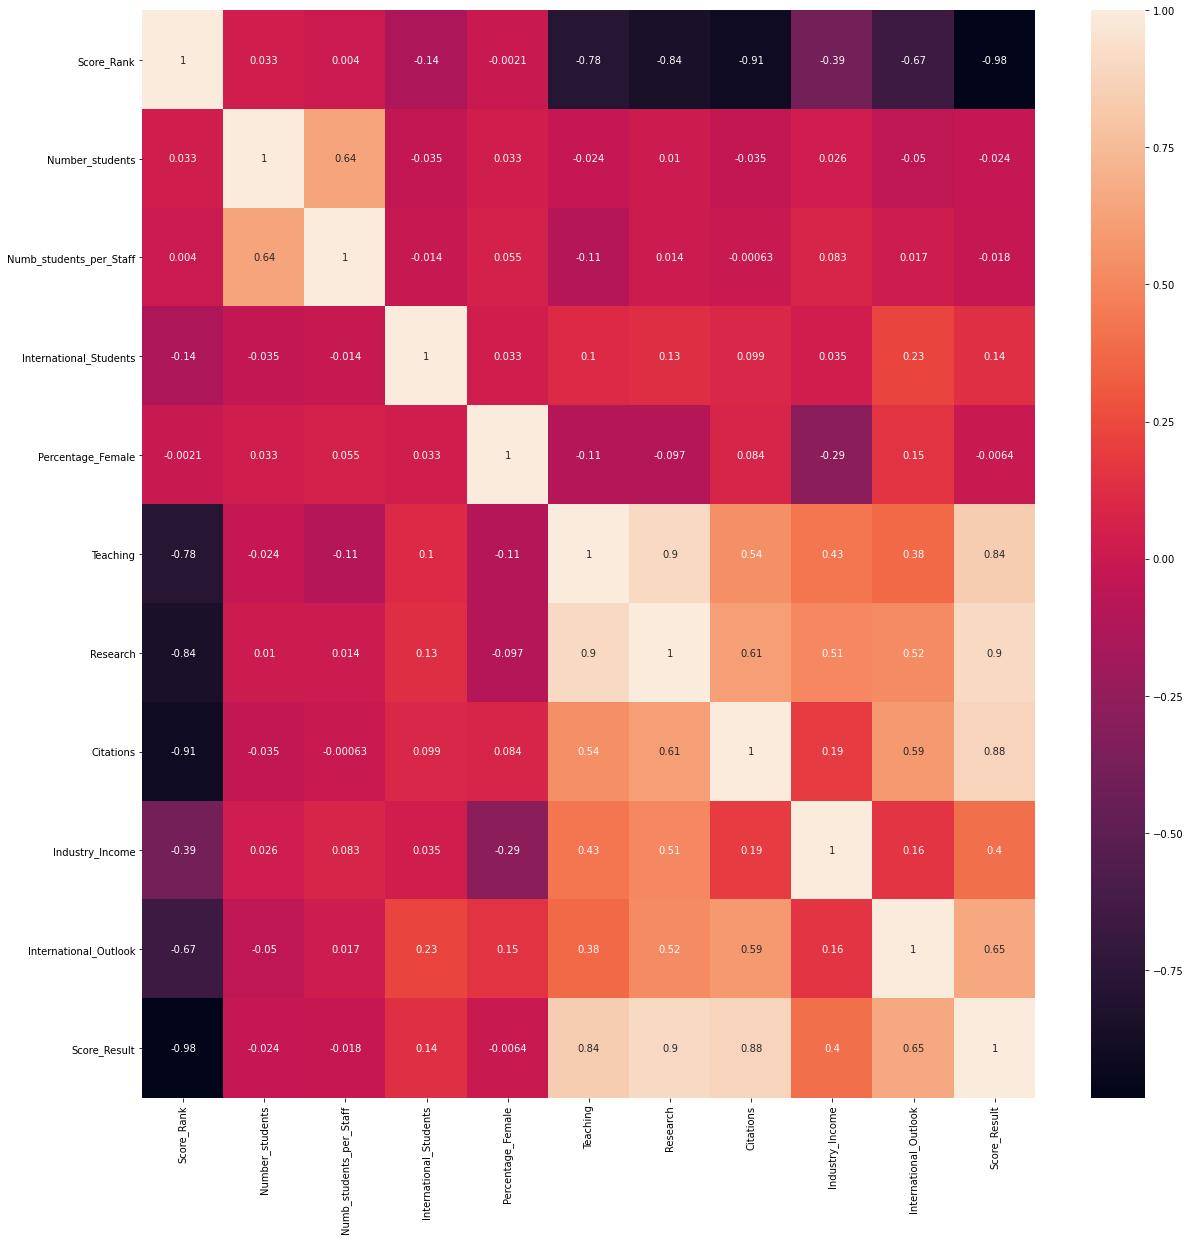

In [36]:
f, ax =plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot = True)

In [37]:
#finding optimal number of clusters

In [38]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [39]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [40]:
df_scaled 

array([[-2.23075914, -0.09322243, -0.46150648, ...,  1.16935673,
         2.11703839,  3.57768178],
       [-2.22366169, -0.65468487, -0.7467206 , ...,  2.55246826,
         1.5199691 ,  3.5245531 ],
       [-2.21656425, -0.14460246, -0.47933236, ...,  0.78823266,
         2.05690191,  3.51864991],
       ...,
       [ 1.54508271, -0.25863809, -0.46744844, ..., -0.5887317 ,
        -1.30644523, -1.39870414],
       [ 1.55218016, -0.20180312,  0.35254216, ..., -0.70552779,
        -1.2634906 , -1.40460732],
       [ 1.5592776 , -0.43999192,  0.39413588, ..., -0.42275832,
        -1.2634906 , -1.42231688]])

In [41]:
#apply elbow method with WCSS (Within Cluster Sum of Squares)

In [42]:
scores_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

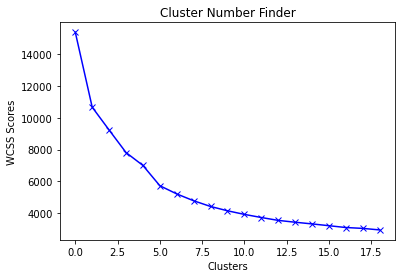

In [43]:
plt.plot(scores_1, 'bx-')
plt.title('Cluster Number Finder')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show()

In [44]:
# 4-7 is where the elbow could bend.

In [45]:
#apply k-means clustering

In [46]:
kmeans=KMeans(6)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [47]:
labels

array([2, 2, 2, ..., 1, 1, 1])

kmeans.cluster_centers_.shape

In [48]:
#df_scaled is an array. Changing it to a df named dfscaled

In [49]:
dfscaled = pd.DataFrame(df_scaled)

In [50]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns = [dfscaled.columns])

In [51]:
cluster_centers

,0,1,2,3,4,5,6,7,8,9,10
0,-0.299857,-0.091611,0.017098,0.055302,0.502192,-0.206984,-0.168063,0.556495,-0.435053,0.429121,0.202981
1,0.902426,0.034686,-0.068608,-0.201978,-0.118078,-0.548368,-0.634614,-0.871043,-0.308445,-0.710944,-0.842756
2,-1.951136,0.152964,-0.211607,0.351670,-0.288561,2.794248,2.834276,1.359974,1.025527,1.100527,2.385708
3,0.934702,24.574068,28.196571,-0.295498,-0.656115,-1.076680,0.006779,-1.140210,3.290128,-1.280672,-0.879224
4,1.474108,-0.083379,-0.176292,35.552723,0.652633,-0.836304,-0.945832,-1.457605,-0.656350,-0.911263,-1.327866
5,-1.013119,-0.077934,0.100067,0.136345,-0.457026,0.717753,0.842863,0.711295,1.109416,0.626062,0.881901


In [52]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,273.055814,20716.879070,19.254651,0.144651,0.555860,25.301395,21.034884,63.542326,39.400000,57.104651,38.232558
1,442.452342,24861.213247,17.812278,0.045897,0.456333,20.472698,12.855897,23.962843,41.459612,30.563489,20.517771
2,40.397727,28742.420455,15.405682,0.258409,0.428977,67.752273,73.668182,85.819318,63.160227,72.735227,75.207955
3,447.000000,830104.000000,493.500000,0.010000,0.370000,13.000000,24.100000,16.500000,100.000000,17.300000,19.900000
4,523.000000,20987.000000,16.000000,13.770000,0.580000,16.400000,7.400000,7.700000,35.800000,25.900000,12.300000
5,172.560311,21165.665370,20.650973,0.175759,0.401946,38.381323,38.757198,67.834241,64.524903,61.689494,49.733463


In [53]:
labels.shape

(1396,)

In [54]:
labels.max()

5

In [55]:
labels.min()

0

In [56]:
#add column showing the Cluster each university is in

In [57]:
df_cluster = pd.concat([df, pd.DataFrame({'Cluster':labels})], axis = 1)

In [58]:
df_cluster

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result,Cluster
0,1,20664,11.2,0.41,0.46,90.5,99.6,98.4,65.5,96.4,95.4,2
1,2,2240,6.4,0.30,0.34,92.1,97.2,97.9,88.0,82.5,94.5,2
2,3,18978,10.9,0.37,0.47,91.4,98.7,95.8,59.3,95.0,94.4,2
3,4,16135,7.3,0.23,0.43,92.8,96.4,99.9,66.2,79.5,94.3,2
4,5,11247,8.6,0.34,0.39,90.5,92.4,99.5,86.9,89.0,93.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1391,531,20174,17.8,0.00,0.55,16.2,8.3,6.1,35.6,16.3,11.3,1
1392,532,34101,21.3,0.00,0.57,15.3,7.7,6.7,35.1,19.4,11.2,1
1393,533,15236,11.1,0.03,0.63,17.0,8.1,4.5,36.9,16.7,11.1,1
1394,534,17101,24.9,0.00,0.54,13.8,7.8,7.6,35.0,17.7,11.0,1


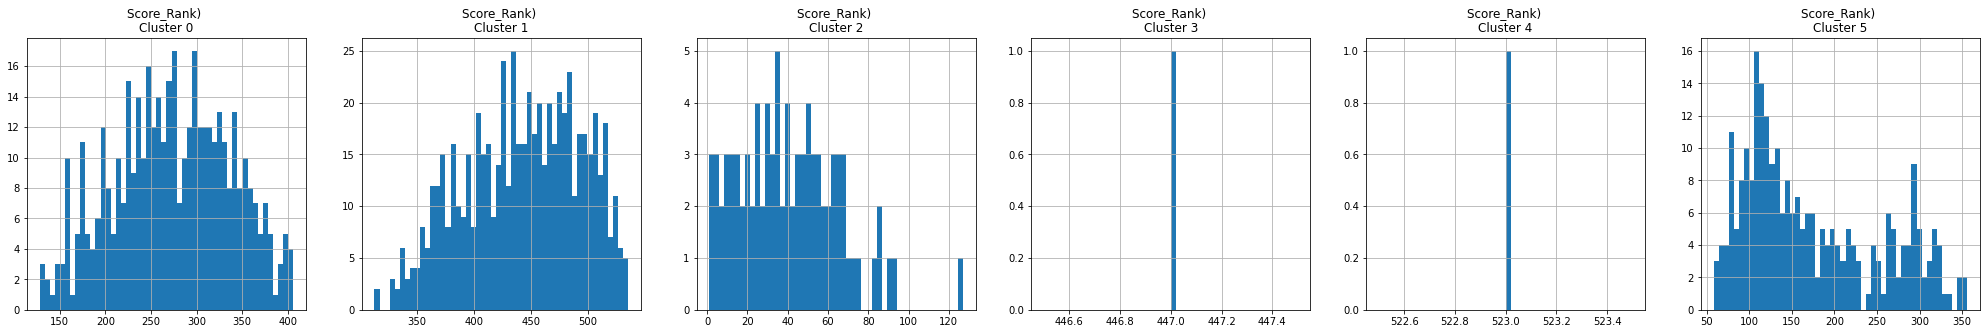

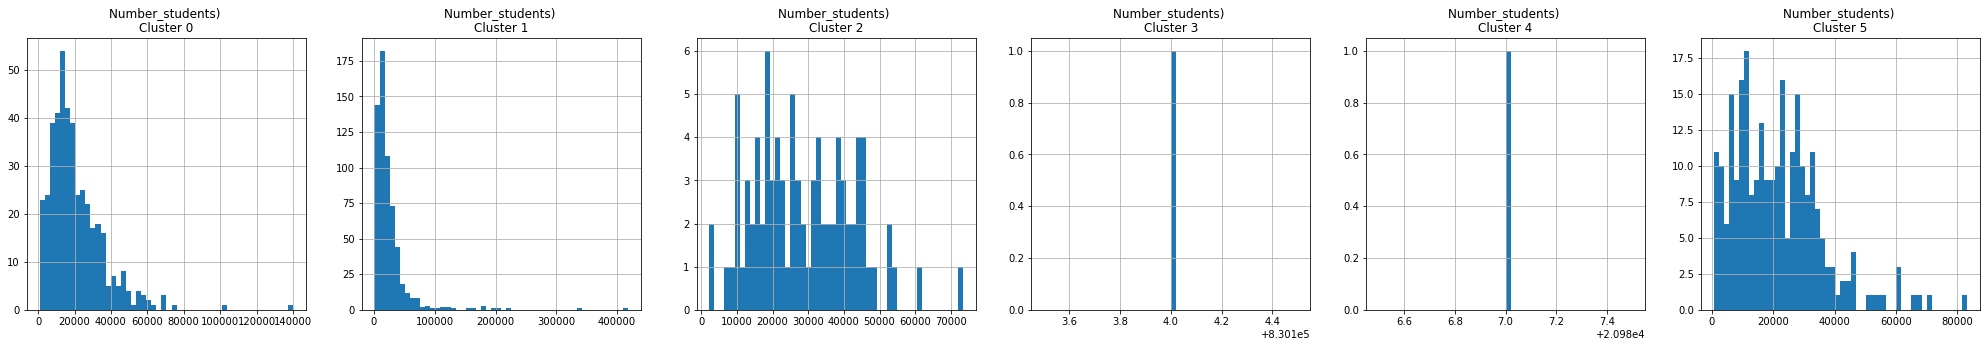

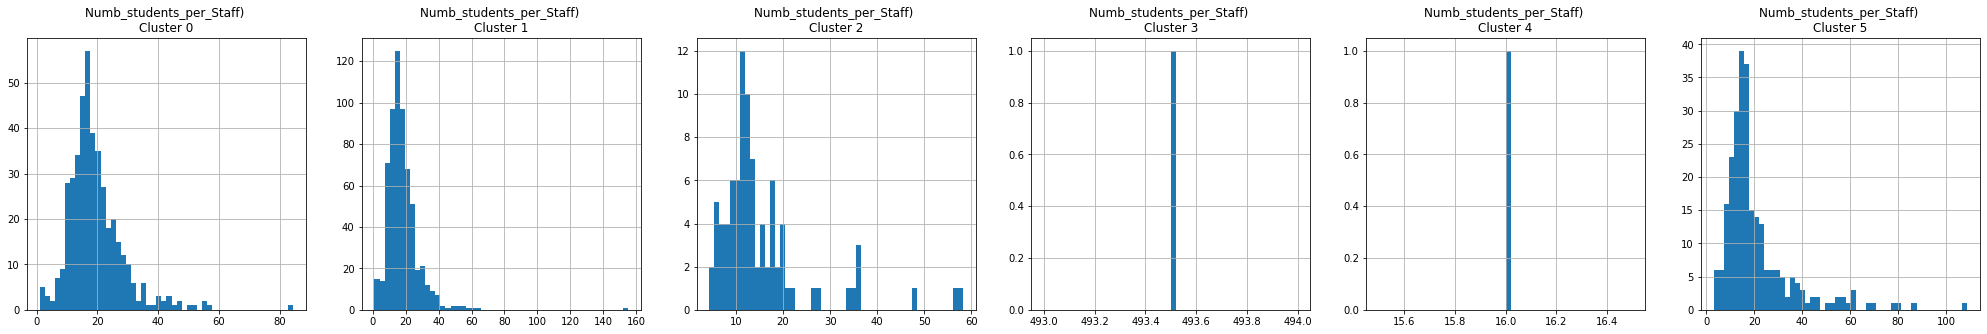

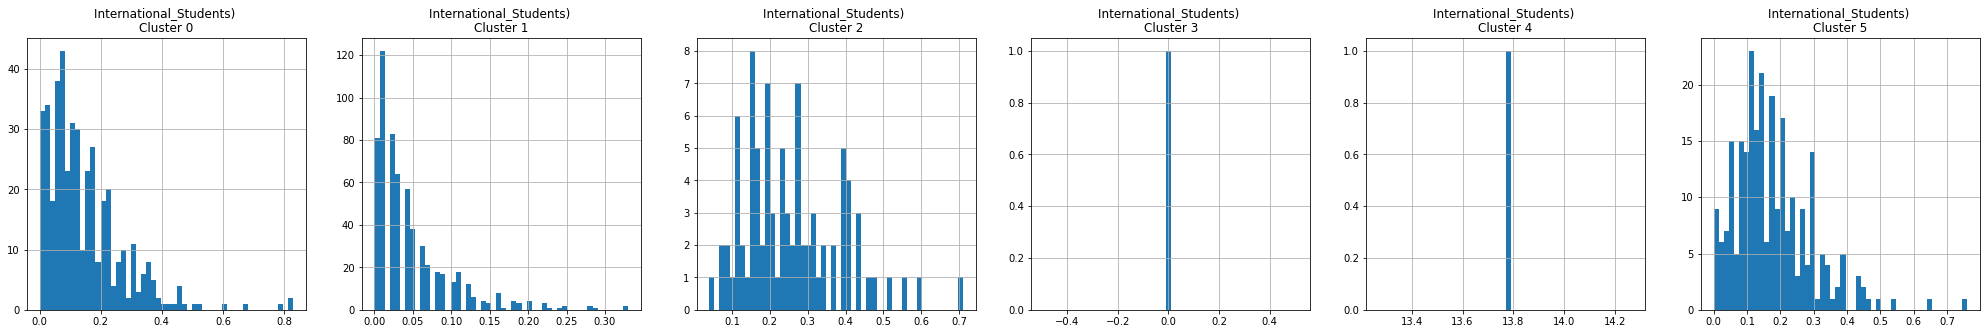

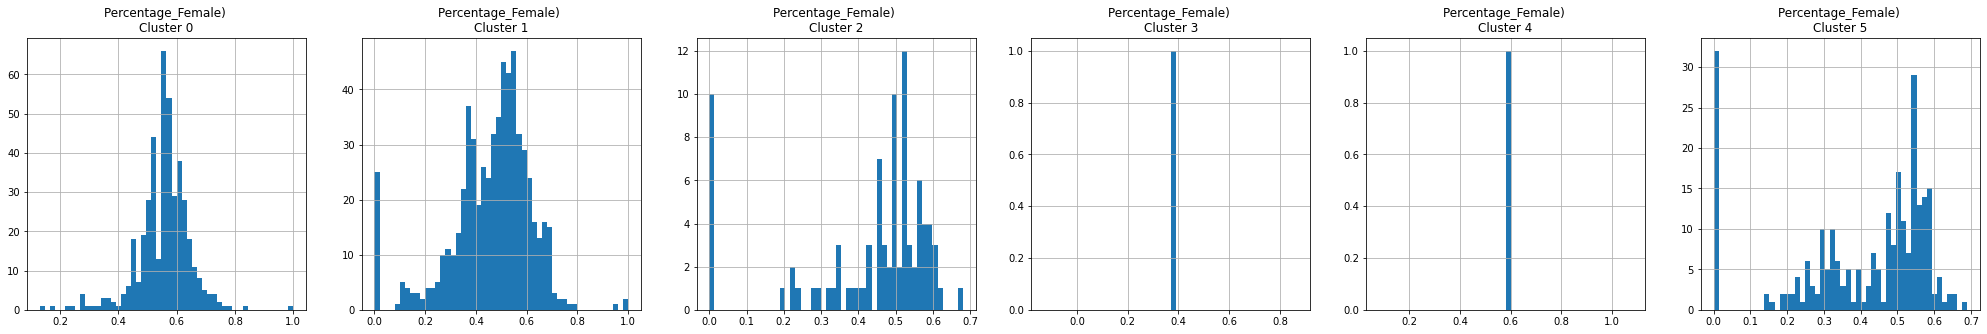

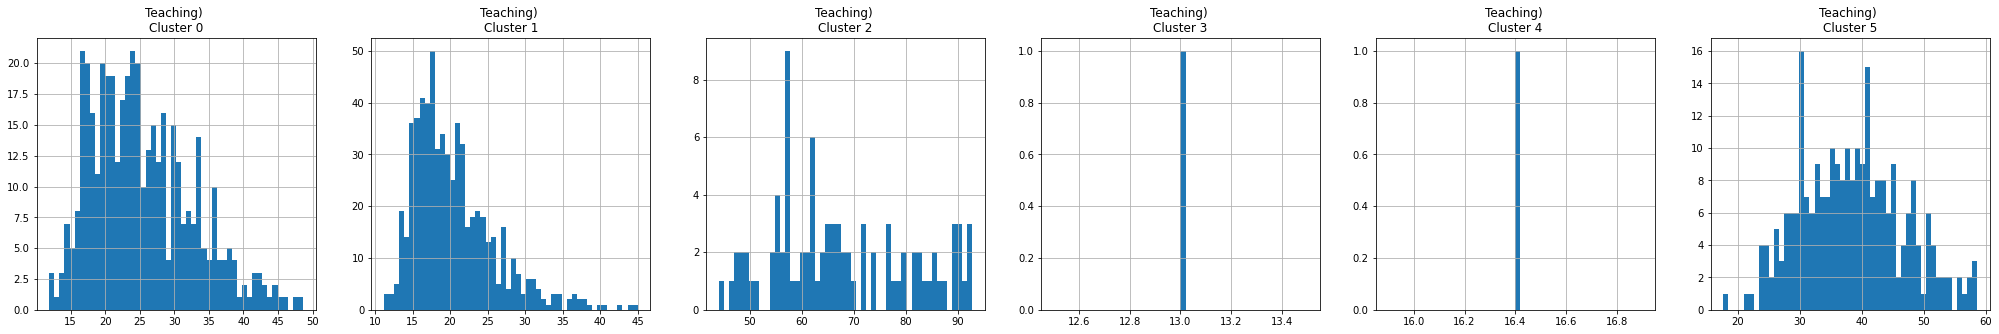

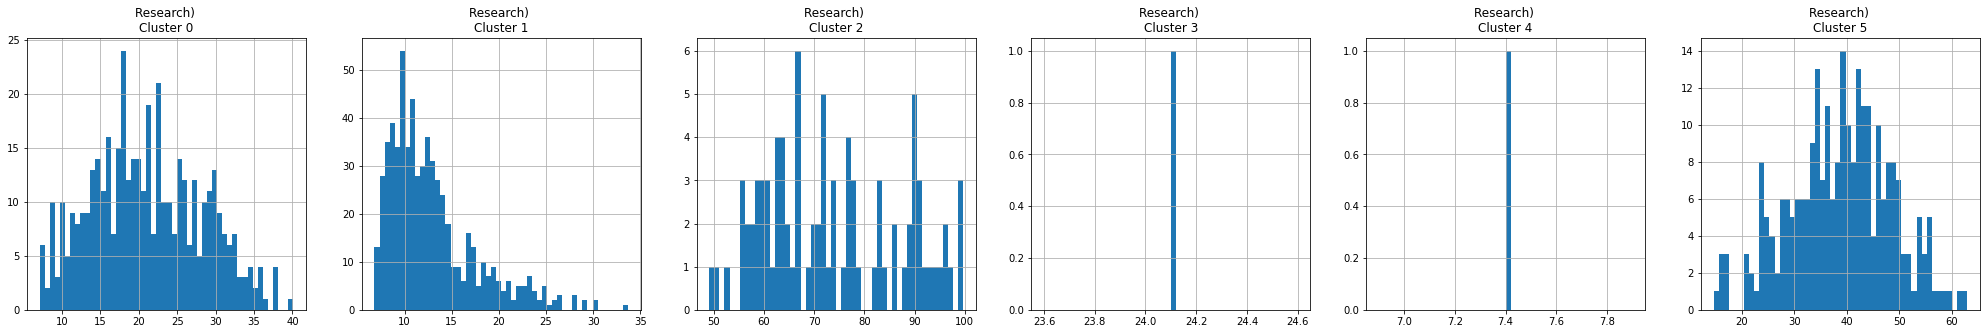

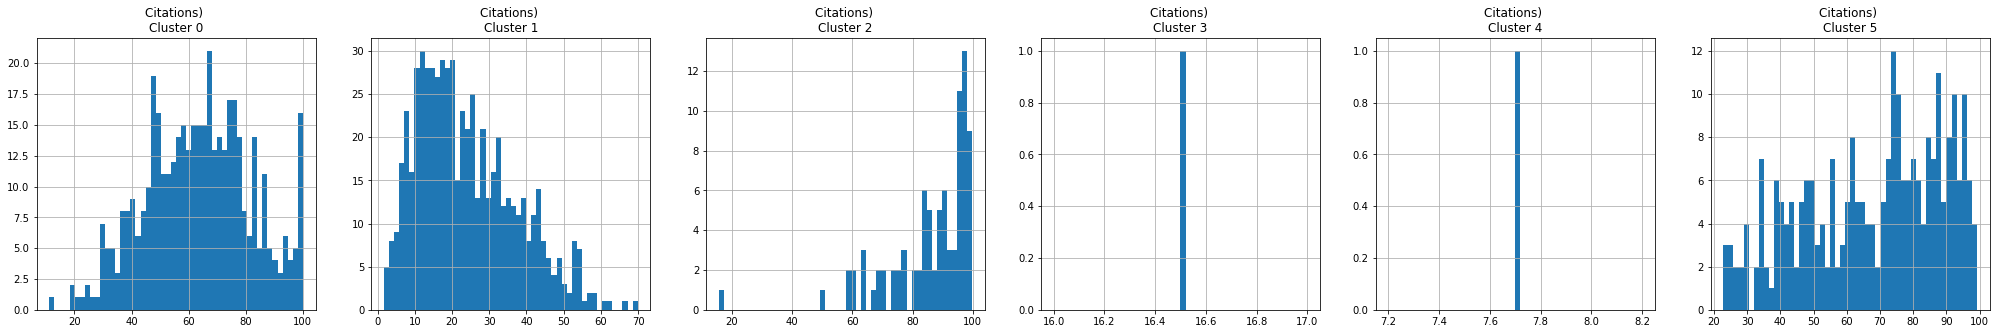

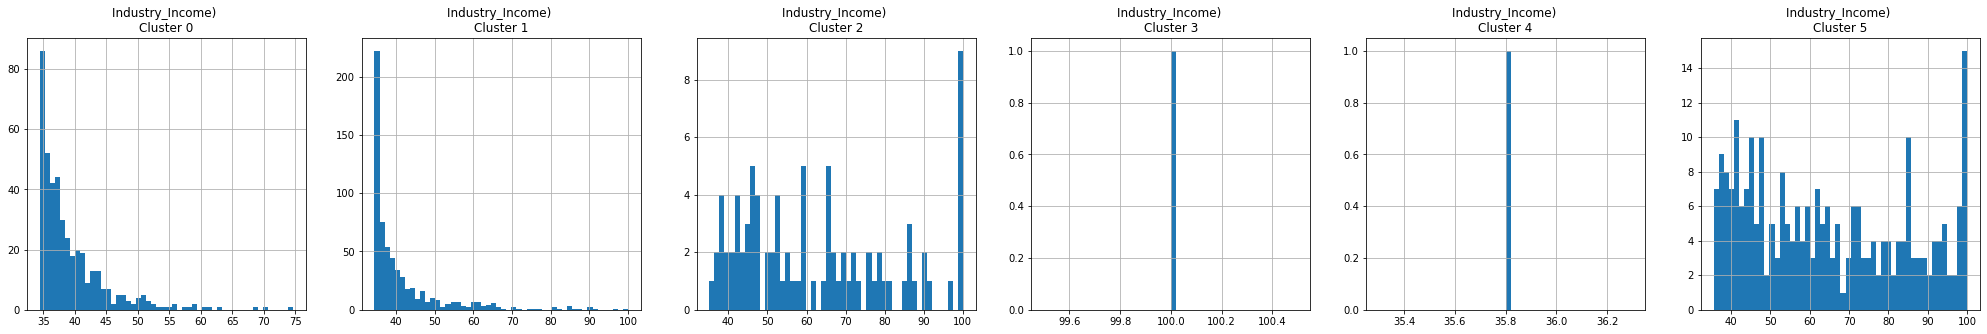

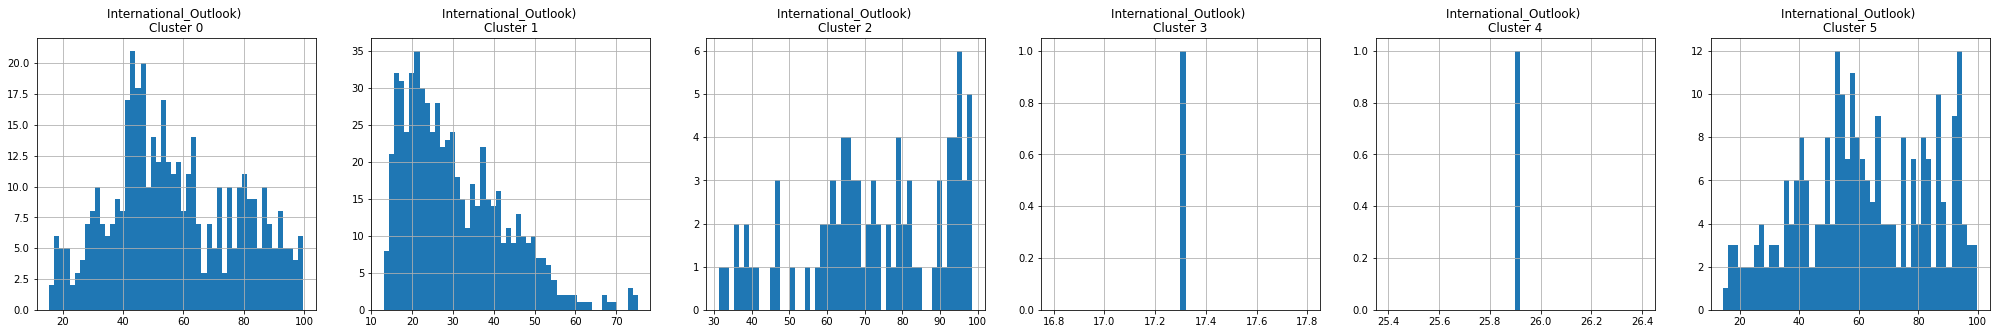

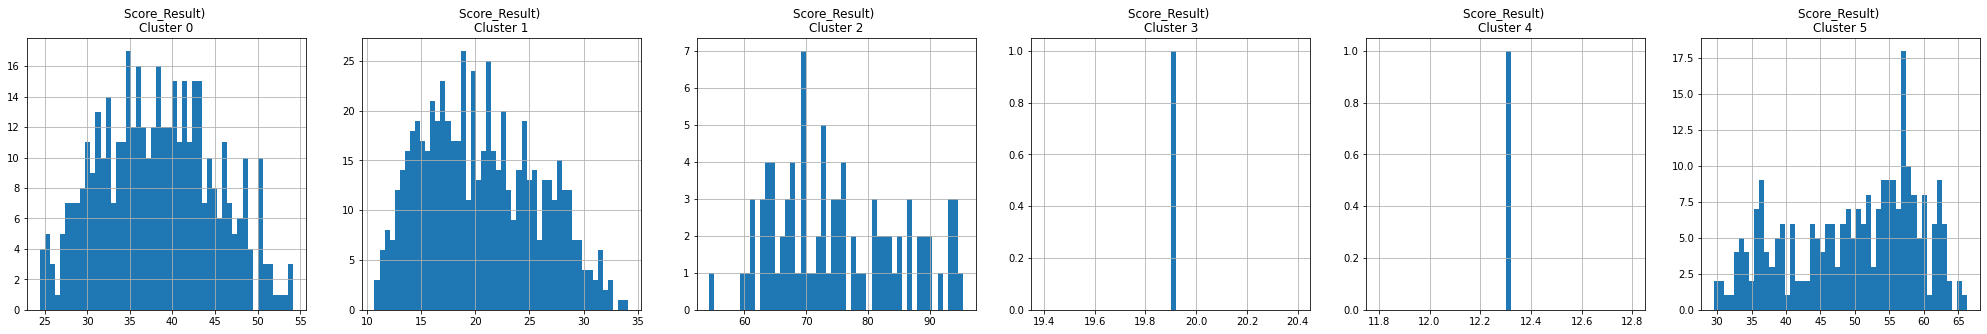

In [59]:
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(6):  
        plt.subplot(1, 6, j+1)
        cluster = df_cluster[df_cluster['Cluster'] == j]
        cluster[i].hist(bins = 50)
        plt.title('{}) \nCluster {}'.format(i,j))
        
    #plt.show

In [60]:
 #I want to reduce the features of the clusters via Principle Component Analysis

In [61]:
pca = PCA(n_components = 2)
principle_comp = pca.fit_transform(df_scaled)
principle_comp

array([[ 7.70290173, -0.324658  ],
       [ 7.77059579, -0.81352252],
       [ 7.52860113, -0.40617208],
       ...,
       [-3.12984054, -0.50992956],
       [-3.20478527,  0.0794585 ],
       [-3.087526  , -0.16019301]])

In [62]:
pca_df = pd.DataFrame(data = principle_comp, columns = ['pca1', 'pca2'])
pca_df.head(5)

,pca1,pca2
0,7.702902,-0.324658
1,7.770596,-0.813523
2,7.528601,-0.406172
3,7.425154,-0.578130
4,7.672383,-0.533046


In [63]:
#concatonate cluster labels to df

In [64]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head(5)

,pca1,pca2,cluster
0,7.702902,-0.324658,2
1,7.770596,-0.813523,2
2,7.528601,-0.406172,2
3,7.425154,-0.578130,2
4,7.672383,-0.533046,2


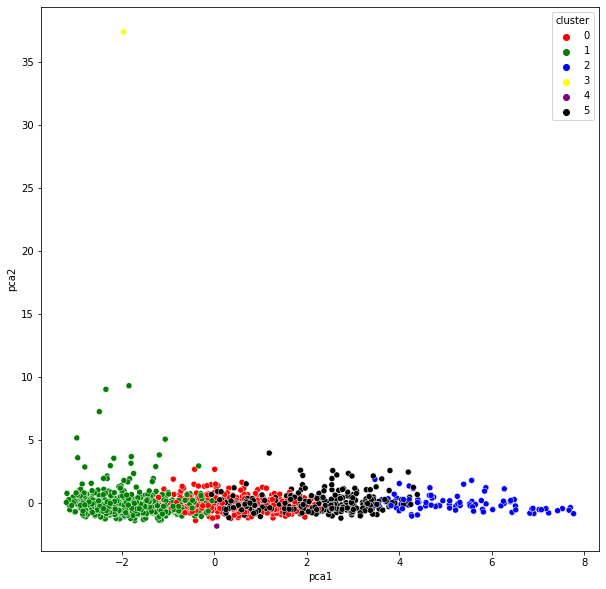

In [65]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'yellow', 'purple', 'black'])

In [66]:
#try dimensionality reduction using autoencoders

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD